In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import wntr, plotting, experiment
from waterpipe_eval import plot_percentiles

In [3]:
inp_file = 'medium_net.inp'

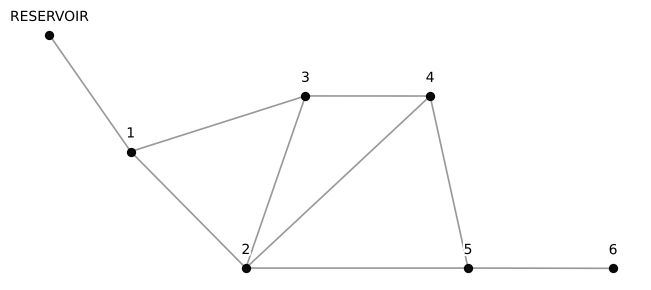

In [4]:
base_wn = wntr.network.WaterNetworkModel(inp_file)
plotting.plot_network(base_wn, node_size=18, label_offset=8)

In [5]:
results = experiment.run_epanet(base_wn, Ns=[5, 10, 15])

N = 5, demand-junction-IDs=['2', '3', '6'], time=5.203148126602173
N = 10, demand-junction-IDs=['2', '3', '6'], time=37.56789302825928
N = 15, demand-junction-IDs=['2', '3', '6'], time=132.72438979148865


In [9]:
results, df = experiment.run_PINN(base_wn, results)


N = 5, t=8.152726173400879
N = 10, t=8.829952716827393
N = 15, t=12.000294923782349


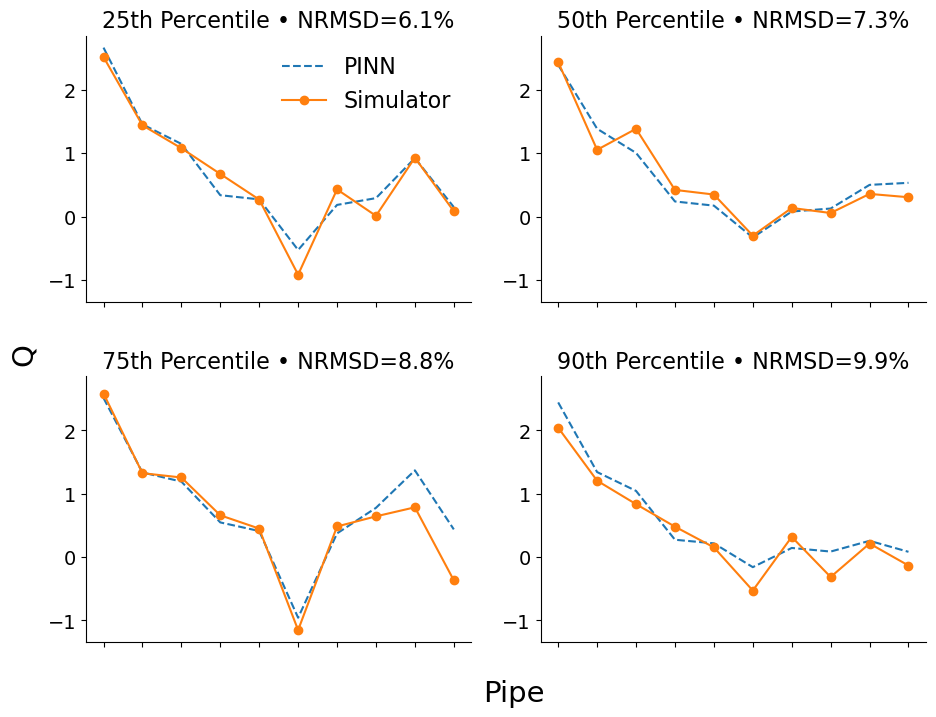

In [7]:
plot_percentiles(results[-1].Q_pred, results[-1].Q_true, percentiles=(25, 50, 75, 90))

In [8]:
from IPython.display import display
display(df)

,N,# demand junctions,epanet time (s),PINN time,mean NRMSD
0,5.0,3.0,5.203148,10.218137,0.024131
1,10.0,3.0,37.567893,28.448745,0.021368
2,15.0,3.0,132.724390,47.692665,0.023549
